# COMP1804 - Applied Machine Learning

Dataset
Option 1: 
<br>
Predicting the severity of road accidents in the UK.
Emergency services in the UK (non-commercial entities) are looking into developing a
system to provide a more effective response in case of road accidents. They want to know if
it would be possible to predict the severity of an accident using some variables that can
potentially be gathered on the place of the accident. They provide you with a dataset of all
the accidents that occurred in 2019 in the UK which contain their variable of interest.
They want you to use machine learning techniques to predict the accident severity in details
(that is, whether an accident is “fatal”, “serious” or “slight” – 3 classes in total), from all the
other features in the dataset. For the avoidance of doubt, the information about accident
severity is contained in the column titled “accident_severity”.

### Basic import and exploration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import numpy as np
import seaborn as sns
import holoviews as hv

In [2]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [3]:
from google.colab import files
import io
import warnings
warnings.filterwarnings(action="ignore")

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['OPTION1_uk_road_accident_2019_coursework_final.csv']))

Saving OPTION1_uk_road_accident_2019_coursework_final.csv to OPTION1_uk_road_accident_2019_coursework_final (1).csv


In [4]:
# Data set info
print("Data points and features:\n",df.shape)
print("\nThe list of all the features:\n",df.columns)
print("\nAll the features with its datatype:\n",df.dtypes)


Data points and features:
 (31647, 14)

The list of all the features:
 Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')

All the features with its datatype:
 accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
acci

In [5]:
# The first five rows of the dataset
df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


### Data quality and Data analysis

Numerical columns

In [6]:
# Summary statistics for numerical features
print(df.shape)
print(df.describe())
# df = df.drop_duplicates()
print(df.shape)

(31647, 14)
        speed_limit  age_of_oldest_driver
count  31647.000000          25197.000000
mean      36.572029             47.254038
std       13.837362             16.779656
min       -1.000000              6.000000
25%       30.000000             34.000000
50%       30.000000             47.000000
75%       40.000000             59.000000
max       70.000000            101.000000
(31647, 14)


Categorical columns

In [7]:
categorical_columns =  [ 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
        'accident_severity']


for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437


Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118


Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55


Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63


Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470


Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034


Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967


Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863


Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304


Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016


Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


Severity has both names slight and Slight similarly for fatal and serious so renaming those will be better for quality

In [8]:
print(f"Some accident_severity has issues so renaming the label to match:")
df.loc[df.accident_severity=='Serious','accident_severity'] = 'serious'
df.loc[df.accident_severity=='Slight','accident_severity'] = 'slight'
df.loc[df.accident_severity=='Fatal','accident_severity'] = 'fatal'
pretty_print_df(df['accident_severity'].value_counts() )


Some accident_severity has issues so renaming the label to match:


,accident_severity
slight,12691
serious,11617
fatal,6167


In [9]:
# Index here is accident_index
print(f"Duplicate records with same index:")
df.duplicated(subset = 'accident_index').sum()

Duplicate records with same index:


1172

In [10]:
print("Data set shape before removing duplicates",df.shape)
# dropping dupplicates
df = df.drop_duplicates(subset = ['accident_index'])
print("Data set shape after removing duplicates",df.shape)

Data set shape before removing duplicates (31647, 14)
Data set shape after removing duplicates (30475, 14)


### Managing missing data

In [11]:
print("The number of NaN in the dataset:")
print(df.isna().sum())

The number of NaN in the dataset:
accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6235
accident_severity              1172
dtype: int64


Removing all rows with accident_severity is missing.

In [12]:
print("Dropping all the records where accident_severity is NaN as accident_severity:", df.shape)
df = df.dropna(subset=["accident_severity"])
print("After Dropping all the records where accident_severity is NaN as accident_severity:", df.shape)

Dropping all the records where accident_severity is NaN as accident_severity: (30475, 14)
After Dropping all the records where accident_severity is NaN as accident_severity: (29303, 14)


In [13]:
# Finding all the values with speed_limit less than 0
df.loc[df.speed_limit<0, 'speed_limit']= np.nan

In [14]:
print("Dropping all the records where accident_severity is NaN as accident_severity:", df.shape)
df = df.dropna(subset=["speed_limit"])
print("After Dropping all the records where accident_severity is NaN as accident_severity:", df.shape)

Dropping all the records where accident_severity is NaN as accident_severity: (29303, 14)
After Dropping all the records where accident_severity is NaN as accident_severity: (29280, 14)


In [15]:
print("Count of records with each columns with a NaN value:")
df.isna().sum()

Count of records with each columns with a NaN value:


accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           5959
accident_severity                 0
dtype: int64

### Fill missing data with preceding or forwarding values ffill the column age_of_oldest_driver
- Since there are around 6000 rows using mean substitutition might cause a bais towards the mean value so a forward substitution is used.

In [16]:
# Summary statistics for numerical features
print("Count of records with each columns with a NaN value:")
df.isna().sum()

Count of records with each columns with a NaN value:


accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           5959
accident_severity                 0
dtype: int64

In [17]:
df = df.fillna({
        'age_of_oldest_driver' : df['age_of_oldest_driver'].ffill(),
    })

In [18]:
print("Count of records with each columns with a NaN value:")
df.isna().sum()

Count of records with each columns with a NaN value:


accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

### Exploratory Data analysis

In [19]:
df.shape

(29280, 14)

In [20]:
df['skidding_and_overturning'].value_counts()

no skidding or overturning                    22551
at least one vehicle skidded or overturned     4848
data missing or out of range                   1881
Name: skidding_and_overturning, dtype: int64

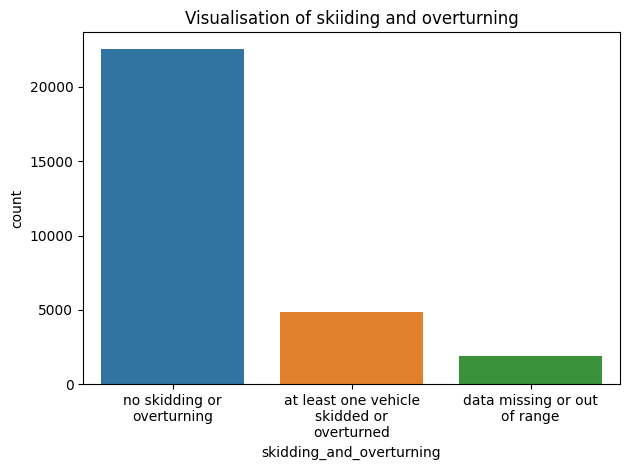

In [21]:
import textwrap 

max_width = 20
ax = sns.countplot(x=df["skidding_and_overturning"], )
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_title("Visualisation of skiiding and overturning")


plt.tight_layout()

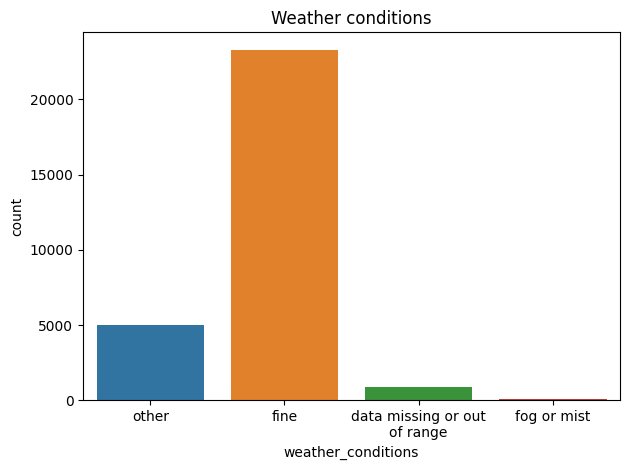

In [22]:
max_width = 20
ax = sns.countplot(x=df["weather_conditions"])
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_title("Weather conditions")


plt.tight_layout()

Text(0.5, 1.0, 'Sex of driver')

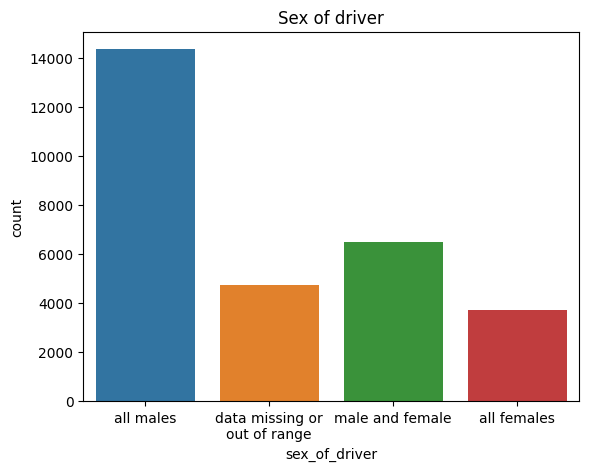

In [23]:
max_width = 18
ax = sns.countplot(x=df["sex_of_driver"], )
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_title("Sex of driver")


array([[<Axes: title={'center': 'speed_limit'}>,
        <Axes: title={'center': 'age_of_oldest_driver'}>]], dtype=object)

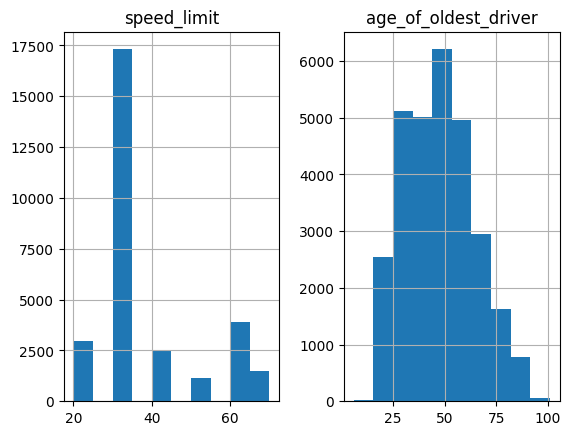

In [24]:
df.hist()

Text(0.5, 1.0, 'Accident Severity')

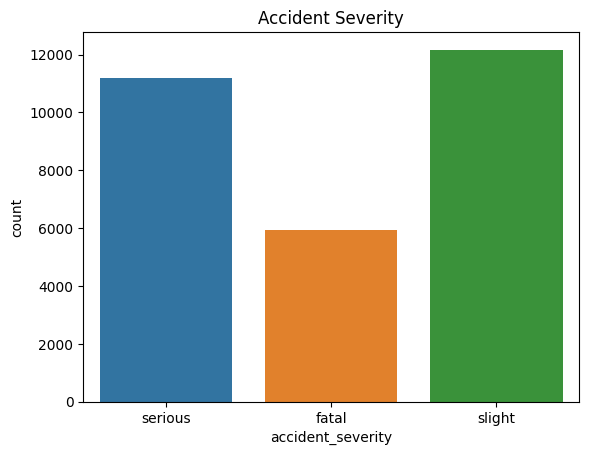

In [25]:
max_width = 20
ax = sns.countplot(x=df["accident_severity"], )
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_title("Accident Severity")


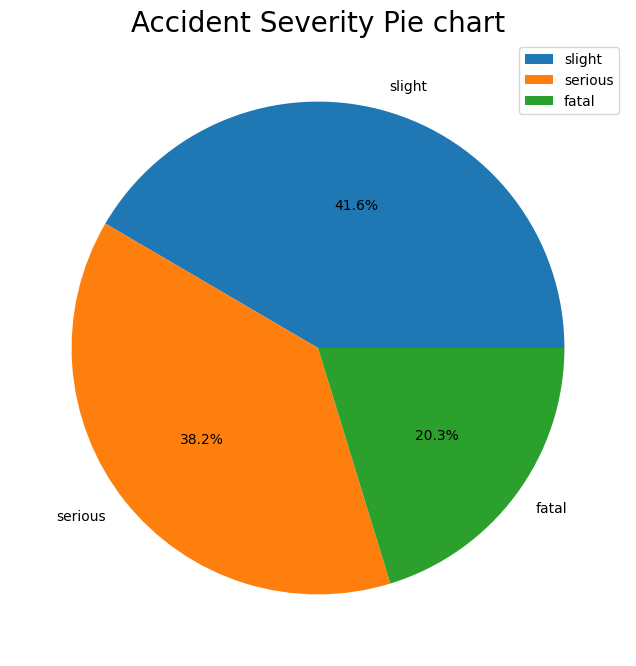

In [26]:
plt.figure(figsize=(8, 8))
cols  = ['slight','serious', 'fatal' ]
plt.pie(df['accident_severity'].value_counts(), labels=cols, autopct='%1.1f%%')
plt.title('Accident Severity Pie chart', fontsize=20)
plt.legend(loc=1)
plt.show()

Text(0.5, 1.0, 'Sex based severity in accidents')

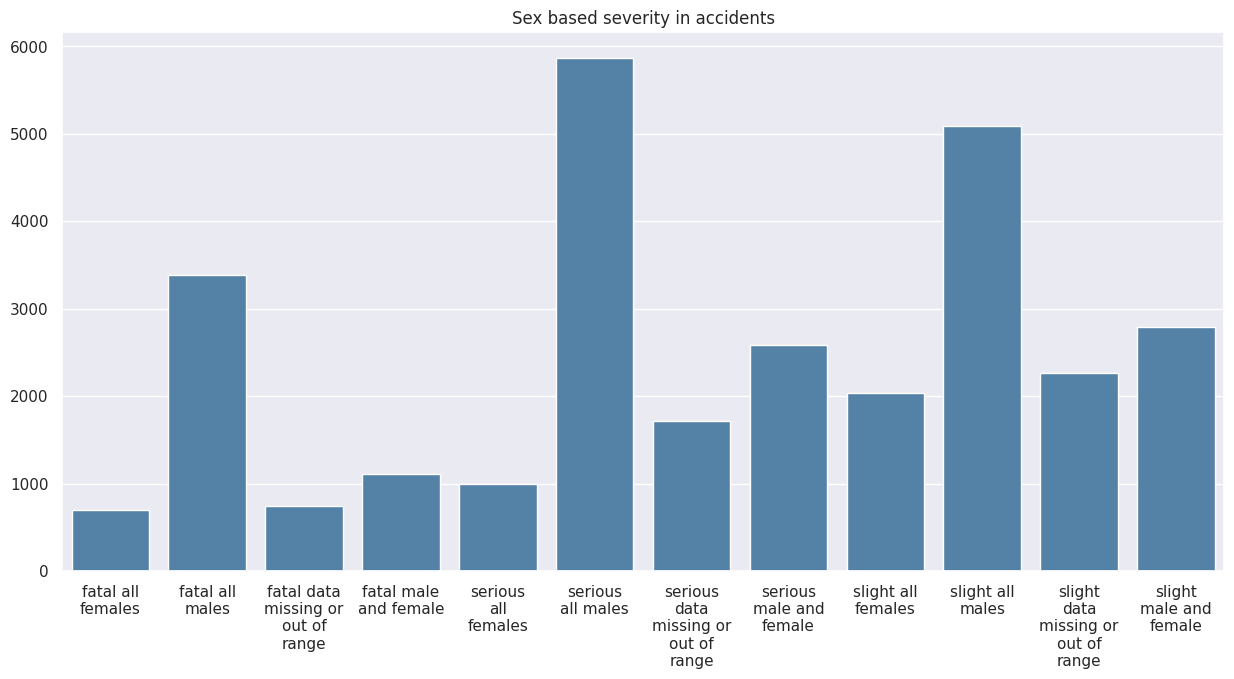

In [27]:
max_width = 10
driver_sex = df.groupby(by = ['accident_severity', 'sex_of_driver']).accident_severity.count()

index =  [' '.join(x) for x in driver_sex.index]

sns.set(rc={'figure.figsize':(15,7)})
ax = sns.barplot( x=index , y = driver_sex.values, data = driver_sex, palette=['steelblue'] )
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

ax.set_title("Sex based severity in accidents")



### Encoding categorical data

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Using  one hot encoder to encode the various columns
ct = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(), 
            [ 'light_conditions', 'weather_conditions',
        'road_surface_conditions', 'vehicle_type', 'junction_location',
        'skidding_and_overturning', 'vehicle_leaving_carriageway',
        'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
          ], 
        ),
    ],
    remainder="passthrough", 
    verbose_feature_names_out=False 
)


encoded_array= ct.fit_transform(df) 


encoded_col_names= ct.get_feature_names_out() 
print(encoded_col_names) 

tmp_train_dataset_no_nans = pd.DataFrame(encoded_array, columns=encoded_col_names)

['light_conditions_darkness' 'light_conditions_daylight'
 'weather_conditions_data missing or out of range'
 'weather_conditions_fine' 'weather_conditions_fog or mist'
 'weather_conditions_other'
 'road_surface_conditions_data missing or out of range'
 'road_surface_conditions_dry'
 'road_surface_conditions_flood over 3cm. deep'
 'road_surface_conditions_other' 'road_surface_conditions_wet or damp'
 'vehicle_type_at least one biped' 'vehicle_type_at least one van'
 'vehicle_type_biped and van' 'vehicle_type_data missing or out of range'
 'vehicle_type_only cars' 'vehicle_type_other'
 'junction_location_at or within 20 metres of junction'
 'junction_location_data missing or out of range'
 'junction_location_not at or within 20 metres of junction'
 'skidding_and_overturning_at least one vehicle skidded or overturned'
 'skidding_and_overturning_data missing or out of range'
 'skidding_and_overturning_no skidding or overturning'
 'vehicle_leaving_carriageway_at least one vehicle leaving ca

In [29]:
tmp_train_dataset_no_nans.columns


Index(['light_conditions_darkness', 'light_conditions_daylight',
       'weather_conditions_data missing or out of range',
       'weather_conditions_fine', 'weather_conditions_fog or mist',
       'weather_conditions_other',
       'road_surface_conditions_data missing or out of range',
       'road_surface_conditions_dry',
       'road_surface_conditions_flood over 3cm. deep',
       'road_surface_conditions_other', 'road_surface_conditions_wet or damp',
       'vehicle_type_at least one biped', 'vehicle_type_at least one van',
       'vehicle_type_biped and van',
       'vehicle_type_data missing or out of range', 'vehicle_type_only cars',
       'vehicle_type_other',
       'junction_location_at or within 20 metres of junction',
       'junction_location_data missing or out of range',
       'junction_location_not at or within 20 metres of junction',
       'skidding_and_overturning_at least one vehicle skidded or overturned',
       'skidding_and_overturning_data missing or out of

In [30]:
sampleClassBias = tmp_train_dataset_no_nans['accident_severity'].value_counts()
print('Training Labels distribution:')
pretty_print_df(sampleClassBias)


Training Labels distribution:


,accident_severity
slight,12173
serious,11176
fatal,5931


### Scaling
- Using standard minmax scalar

In [31]:
# create the Scaling object
from sklearn.preprocessing import MinMaxScaler
my_scaler_num= MinMaxScaler()

numerical_columns = ["speed_limit", "age_of_oldest_driver"]
# fit and transform the appropriate columns in the training data
tmp_train_dataset_no_nans[numerical_columns]= my_scaler_num.fit_transform(tmp_train_dataset_no_nans[numerical_columns]) 

# show results
print(tmp_train_dataset_no_nans[numerical_columns].head())


   speed_limit  age_of_oldest_driver
0          0.2              0.600000
1          0.2              0.800000
2          0.4              0.800000
3          0.4              0.800000
4          0.2              0.347368


In [32]:
tmp_train_dataset_no_nans.drop('accident_index', inplace=True , axis=1)


In [33]:
tmp_train_dataset_no_nans_split = tmp_train_dataset_no_nans.copy()

X = tmp_train_dataset_no_nans_split.drop(['accident_severity'], axis = 1)
Y = tmp_train_dataset_no_nans[['accident_severity']]

print(X.columns)
print(Y.columns)

Index(['light_conditions_darkness', 'light_conditions_daylight',
       'weather_conditions_data missing or out of range',
       'weather_conditions_fine', 'weather_conditions_fog or mist',
       'weather_conditions_other',
       'road_surface_conditions_data missing or out of range',
       'road_surface_conditions_dry',
       'road_surface_conditions_flood over 3cm. deep',
       'road_surface_conditions_other', 'road_surface_conditions_wet or damp',
       'vehicle_type_at least one biped', 'vehicle_type_at least one van',
       'vehicle_type_biped and van',
       'vehicle_type_data missing or out of range', 'vehicle_type_only cars',
       'vehicle_type_other',
       'junction_location_at or within 20 metres of junction',
       'junction_location_data missing or out of range',
       'junction_location_not at or within 20 metres of junction',
       'skidding_and_overturning_at least one vehicle skidded or overturned',
       'skidding_and_overturning_data missing or out of

#### upsampling



In [34]:
from sklearn.utils import resample

#SAMPLING USING SMOTE 
#Importing SMOTE
from imblearn.over_sampling import SMOTE
# Oversampling the data
smote = SMOTE(random_state = 112)
X, Y = smote.fit_resample(X,Y)


serious    12173
fatal      12173
slight     12173
Name: accident_severity, dtype: int64


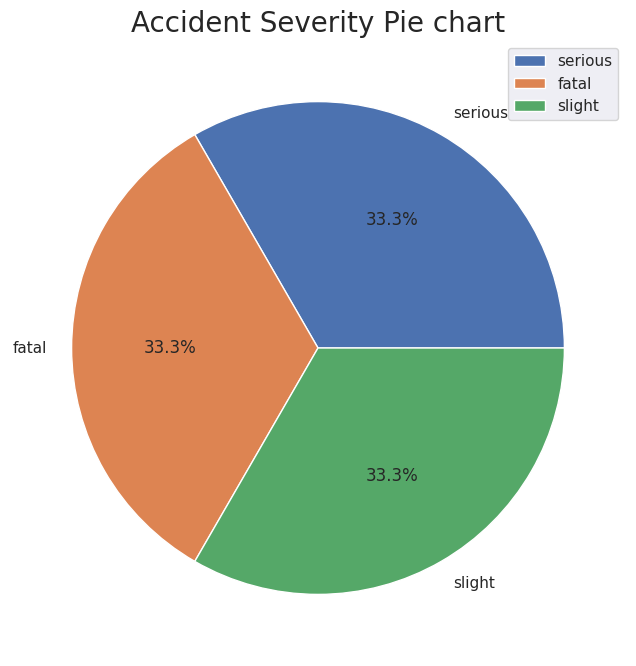

In [35]:
print(Y['accident_severity'].value_counts())
plt.figure(figsize=(8, 8))
plt.pie(Y['accident_severity'].value_counts(), labels=Y['accident_severity'].unique(), autopct='%1.1f%%')
plt.title('Accident Severity Pie chart', fontsize=20)
plt.legend(loc=1)
plt.show()

### Test train 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(Y_train.shape)

(29215, 39)
(29215, 1)


### Train and testing models

#### Decision Tree

In [38]:
from sklearn.metrics import (classification_report, confusion_matrix, 
ConfusionMatrixDisplay, accuracy_score, f1_score, mean_squared_error,classification_report)

def display_confusion_matrix(Y_test, y_pred):
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("F1 score:", f1_score(Y_test, y_pred, average= 'weighted'))
    # print("MSE:", mean_squared_error(Y_test, y_pred, average= 'weighted'))
    

    confusion_mat = confusion_matrix(Y_test, y_pred)
    ConfusionMatrixDisplay(confusion_mat).plot()
    

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=8)

dtree = dtree.fit(X_train, Y_train)
y_pred = dtree.predict(X_test)

For the Traditional Decision Tree model:
Accuracy: 0.7972343921139102
F1 score: 0.7948538143347276


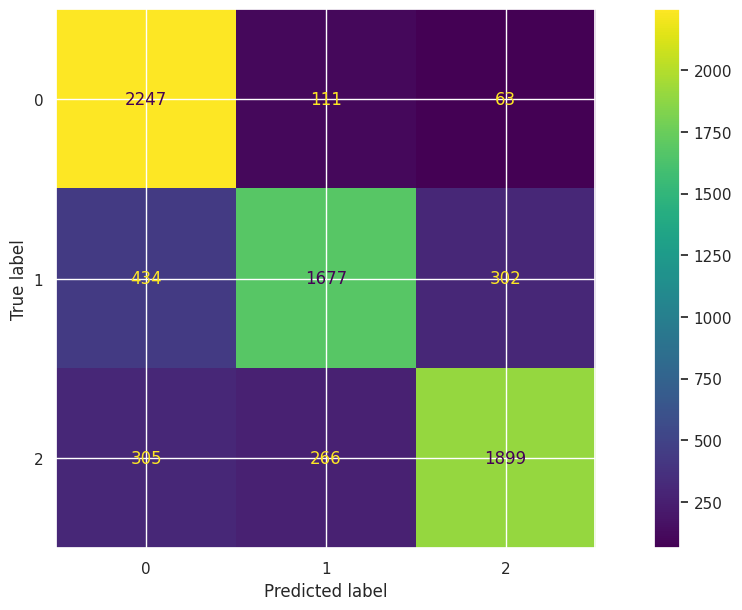

In [40]:
print("For the Traditional Decision Tree model:")
display_confusion_matrix(Y_test, y_pred)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(1,20),
            "criterion":["gini", "entropy", "log_loss"]}

dtree = DecisionTreeClassifier()


search_for_best = RandomizedSearchCV(dtree, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

search_for_best.fit(X_train, Y_train)
# Create a variable for the best model
best_random_forest = search_for_best.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  search_for_best.best_params_)

Best hyperparameters: {'criterion': 'log_loss', 'max_depth': 12}


For the Traditional Decision Tree model:
Accuracy: 0.7972343921139102
F1 score: 0.7948538143347276


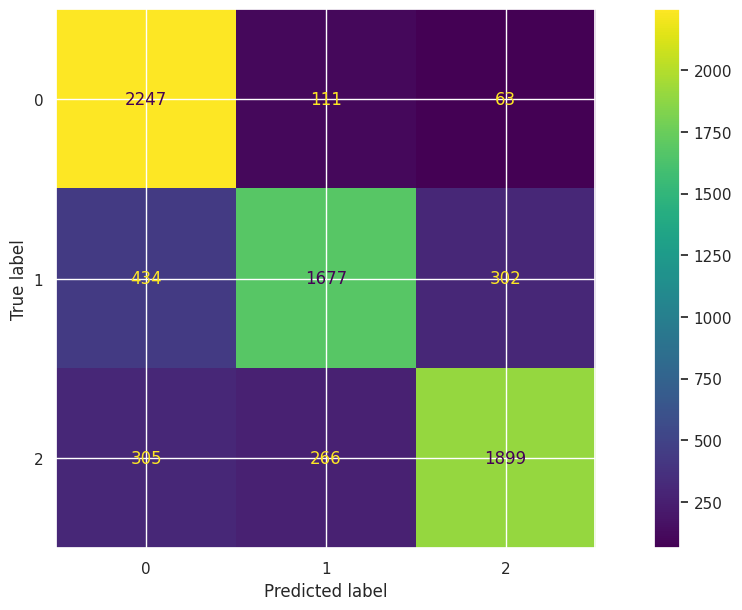

In [42]:
print("For the Traditional Decision Tree model:")
display_confusion_matrix(Y_test, y_pred)

#### Random forest

For the Traditional Random forest model:
Accuracy: 0.7657447973713034
F1 score: 0.7645410020834503


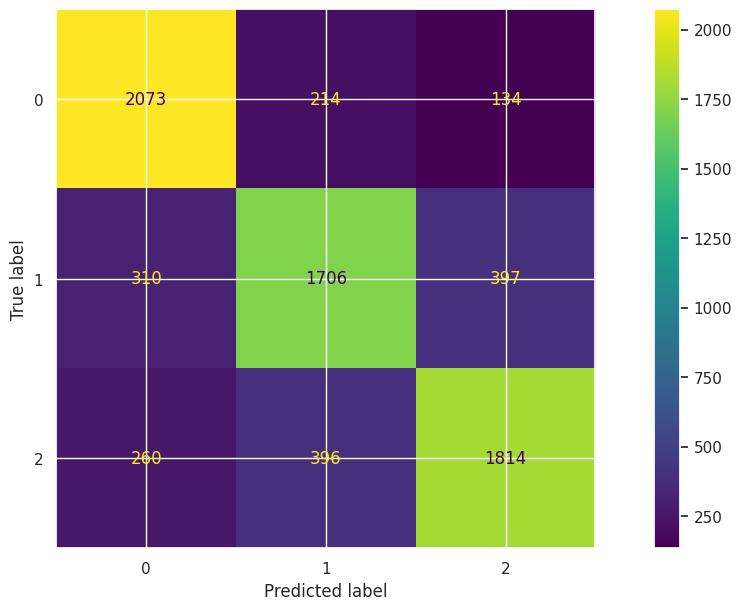

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, Y_train)

y_pred = random_forest.predict(X_test)
print("For the Traditional Random forest model:")
display_confusion_matrix(Y_test, y_pred)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              "criterion": ["gini", "entropy", "log_loss"]}


random_forest = RandomForestClassifier()


search_for_best = RandomizedSearchCV(random_forest, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

search_for_best.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7b90547c70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7b840075e0>})

In [45]:
# Create a variable for the best model
best_random_forest = search_for_best.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',)
print( search_for_best.best_params_)

Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 220}


For the Traditional Random forest model with best hyper parameters:
Accuracy: 0.8077765607886089
F1 score: 0.8054253672798117


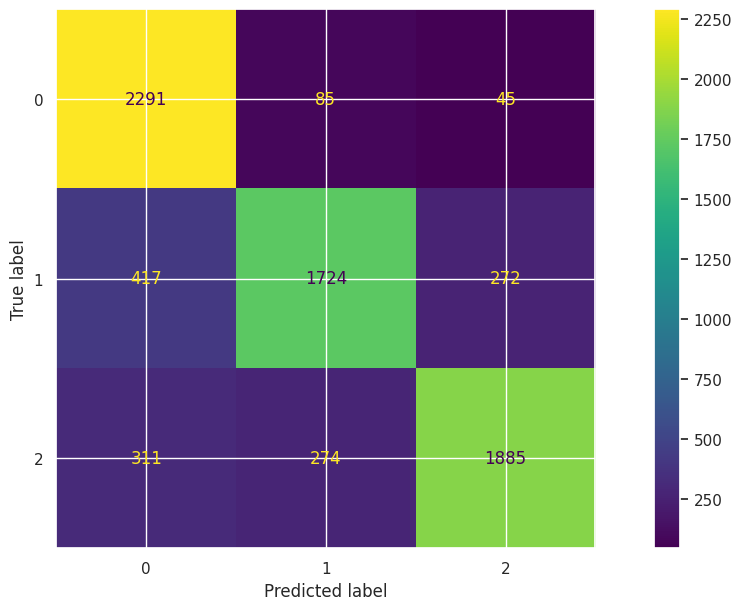

In [46]:
y_pred = best_random_forest.predict(X_test)
print("For the Traditional Random forest model with best hyper parameters:")
display_confusion_matrix(Y_test, y_pred)

#### SVM

For the Traditional SVM with :
Accuracy: 0.7968236582694413
F1 score: 0.7949636963072971


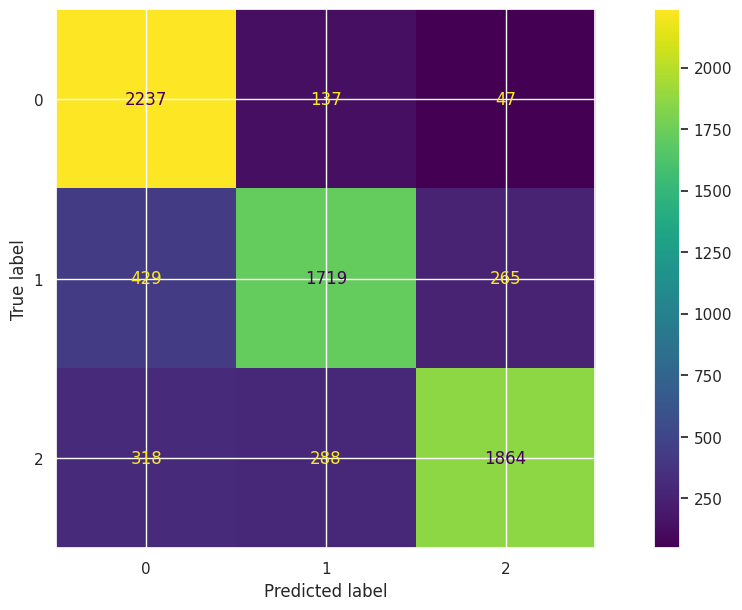

In [47]:
from sklearn import svm as sv

#Create a svm Classifier
svm = sv.SVC(kernel='poly')


svm.fit(X_train, Y_train)

y_pred = svm.predict(X_test)

print("For the Traditional SVM with :")
display_confusion_matrix(Y_test, y_pred)

#### Neural networks

In [48]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64
X_train_fl = np.asarray(X_train).astype('float32')
Y_train_dummies = pd.get_dummies(Y_train).values

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 32)            160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
lstm_model = model.fit(X_train_fl, Y_train_dummies, epochs=epochs, batch_size=batch_size)


Epoch 1/10
457/457 [==============================] - 20s 39ms/step - loss: 0.9899 - accuracy: 0.5012
Epoch 2/10
457/457 [==============================] - 17s 37ms/step - loss: 0.8628 - accuracy: 0.6420
Epoch 3/10
457/457 [==============================] - 18s 39ms/step - loss: 0.8165 - accuracy: 0.6716
Epoch 4/10
457/457 [==============================] - 17s 37ms/step - loss: 0.7739 - accuracy: 0.6964
Epoch 5/10
457/457 [==============================] - 18s 39ms/step - loss: 0.7591 - accuracy: 0.7011
Epoch 6/10
457/457 [==============================] - 17s 37ms/step - loss: 0.7331 - accuracy: 0.7144
Epoch 7/10
457/457 [==============================] - 16s 36ms/step - loss: 0.7250 - accuracy: 0.7197
Epoch 8/10
457/457 [==============================] - 18s 39ms/step - loss: 0.7033 - accuracy: 0.7353
Epoch 9/10
457/457 [==============================] - 17s 37ms/step - loss: 0.6973 - accuracy: 0.7380
Epoch 10/10
457/457 [==============================] - 18s 39ms/step - loss: 0.686

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import datasets, layers, models

# Define the model architecture
def create_model(dropout_rate=0.0):
  model = Sequential()
  model.add(Dense(104, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)
param_grid = {
    'batch_size': [64,32],
    'epochs': [20,40],
    'dropout_rate': [0.2]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_result = grid.fit(X_train_fl,Y_train_dummies)

# Print the best hyperparameters and corresponding accuracy score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/20
305/305 [==============================] - 1s 1ms/step - loss: 0.7637 - accuracy: 0.7063
Epoch 2/20
305/305 [==============================] - 1s 2ms/step - loss: 0.6467 - accuracy: 0.7752
Epoch 3/20
305/305 [==============================] - 1s 2ms/step - loss: 0.6251 - accuracy: 0.7857
Epoch 4/20
305/305 [==============================] - 1s 2ms/step - loss: 0.6152 - accuracy: 0.7868
Epoch 5/20
305/305 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7913
Epoch 6/20
305/305 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.7922
Epoch 7/20
305/305 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7929
Epoch 8/20
305/305 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7953
Epoch 9/20
305/305 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7954
Epoch 10/20
305/305 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.7957

229/229 [==============================] - 0s 865us/step
For the Neural Network models like LSTM :
Accuracy: 0.803395399780942
F1 score: 0.8011329098390902


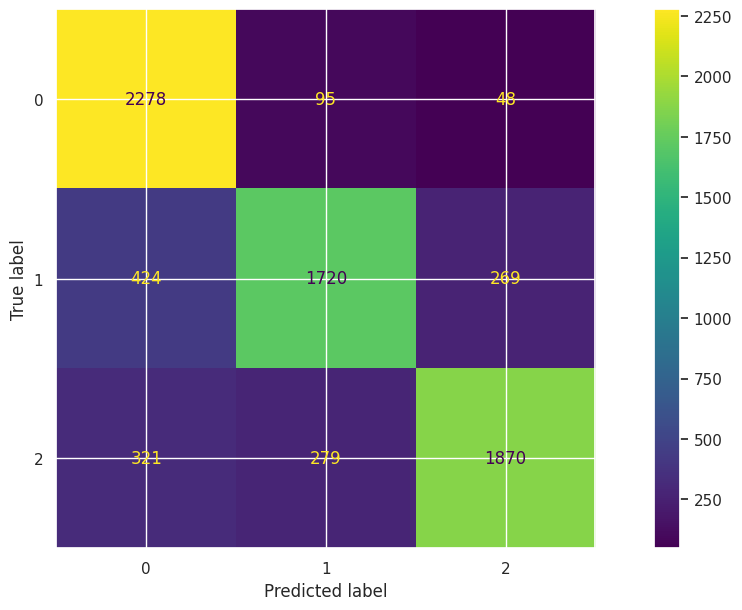

In [51]:
X_test_fl = np.asarray(X_test).astype('float32')
best_lstm = grid_result.predict(X_test_fl)

print("For the Neural Network models like LSTM :")

undummyfied_pred = []
for pred in best_lstm:
        if pred == 0:
            undummyfied_pred.append('fatal')
        elif pred == 1:
            undummyfied_pred.append('serious')
        else:
            undummyfied_pred.append('slight')
display_confusion_matrix(Y_test, undummyfied_pred)